In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import folium
import geocoder
import warnings 
warnings.filterwarnings("ignore")

In [2]:
cd = pd.read_excel('KPMG_datasets.xlsx', sheet_name='CustomerDemographic')
ca = pd.read_excel('KPMG_datasets.xlsx', sheet_name='CustomerAddress')
cn = pd.read_excel('KPMG_datasets.xlsx', sheet_name='NewCustomerList')
tr = pd.read_excel('KPMG_datasets.xlsx', sheet_name='Transactions')

In [3]:
print(tr.info())
print(cd.info())
print(ca.info())
print(cn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [4]:
print(tr['customer_id'].nunique())
print(cd['customer_id'].nunique())
print(ca['customer_id'].nunique())

3494
4000
3999


In [5]:
df = pd.merge(cd, ca, on='customer_id', how='left')

In [6]:
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0,0 Transport Center,3977.0,VIC,Australia,6.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0,4 Dovetail Crossing,2350.0,NSW,Australia,2.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN,736 Roxbury Junction,2540.0,NSW,Australia,6.0
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0,1482 Hauk Trail,3064.0,VIC,Australia,3.0


In [7]:
df.drop('default',axis=1, inplace=True)
tr.drop('product_first_sold_date',axis=1, inplace=True)

In [8]:
df['job_title'].fillna('N/A', inplace=True)

In [9]:
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                                0
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
address                                  4
postcode                                 4
state                                    4
country                                  4
property_valuation                       4
dtype: int64

In [10]:
tr.isnull().sum()

transaction_id        0
product_id            0
customer_id           0
transaction_date      0
online_order        360
order_status          0
brand               197
product_line        197
product_class       197
product_size        197
list_price            0
standard_cost       197
dtype: int64

In [11]:
tr.nunique()

transaction_id      20000
product_id            101
customer_id          3494
transaction_date      364
online_order            2
order_status            2
brand                   6
product_line            4
product_class           3
product_size            3
list_price            296
standard_cost         103
dtype: int64

In [12]:
df.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               196
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
address                                3993
postcode                                873
state                                     5
country                                   1
property_valuation                       12
dtype: int64

In [13]:
df['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [14]:
df['gender'] = df['gender'].replace(['M', 'Male'], 'Male')
df['gender'] = df['gender'].replace(['F', 'Female', 'Femal'], 'Female')
df['gender'] = df['gender'].replace('U', np.nan)

In [15]:
df['postcode'] = df['postcode'].astype(str).str.rstrip('.0')

In [16]:
df['postcode']

0       2016
1       2153
2        nan
3       4211
4       2448
        ... 
3995    3977
3996     235
3997     254
3998    3064
3999    4511
Name: postcode, Length: 4000, dtype: object

In [17]:
df['state'].unique()

array(['New South Wales', nan, 'QLD', 'VIC', 'NSW', 'Victoria'],
      dtype=object)

In [18]:
df['state'] = df['state'].replace(['New South Wales'], 'NSW')
df['state'] = df['state'].replace(['Victoria'], 'VIC')

In [19]:
df['age'] = np.floor((tr['transaction_date'] - df['DOB']) / np.timedelta64(1, 'Y'))
df['age']

0       63.0
1       36.0
2       63.0
3       55.0
4       40.0
        ... 
3995    42.0
3996    15.0
3997     NaN
3998    43.0
3999    26.0
Name: age, Length: 4000, dtype: float64

In [20]:
df['age'].sort_values(ascending=False)

33      173.0
719      85.0
1091     82.0
3409     76.0
2412     74.0
        ...  
3778      NaN
3882      NaN
3930      NaN
3934      NaN
3997      NaN
Name: age, Length: 4000, dtype: float64

In [21]:
df['age'] = df['age'].replace(173, np.nan)

In [22]:
customer_transactions = tr.groupby('customer_id')['transaction_id'].count()
customer_transactions.mean()

5.724098454493418

In [23]:
high_spending_customers = customer_transactions[customer_transactions >= 6].index.tolist()

high_spending_customers_details = df[df['customer_id'].isin(high_spending_customers)]

In [24]:
num_transactions = tr.groupby('customer_id').size().reset_index(name='num_transactions')
high_spending_customers_details = high_spending_customers_details.merge(num_transactions, on='customer_id')

In [25]:
high_spending_customers_details.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age,num_transactions
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10.0,63.0,11
1,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,nan,NaN,NaN,NaN,63.0,8
2,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4.0,40.0,6
3,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0,49 Londonderry Lane,265,NSW,Australia,4.0,55.0,10
4,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,97736 7th Trail,2023,NSW,Australia,12.0,44.0,6


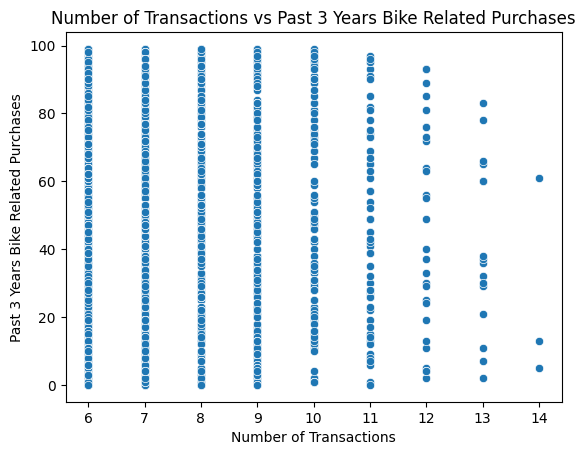

In [28]:
sns.scatterplot(x="num_transactions", y="past_3_years_bike_related_purchases", data=high_spending_customers_details)
plt.xlabel('Number of Transactions')
plt.ylabel('Past 3 Years Bike Related Purchases')
plt.title('Number of Transactions vs Past 3 Years Bike Related Purchases')
plt.show()

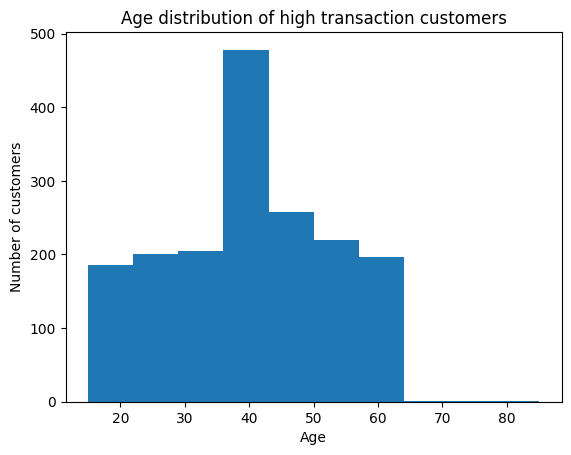

In [27]:
plt.hist(high_spending_customers_details['age'])
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.title('Age distribution of high transaction customers')
plt.show()

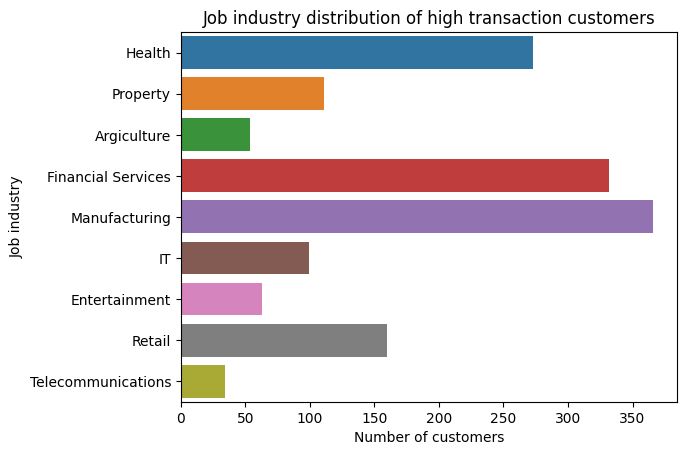

In [28]:
sns.countplot(y='job_industry_category', data=high_spending_customers_details)
plt.ylabel('Job industry')
plt.xlabel('Number of customers')
plt.title('Job industry distribution of high transaction customers')
plt.show()

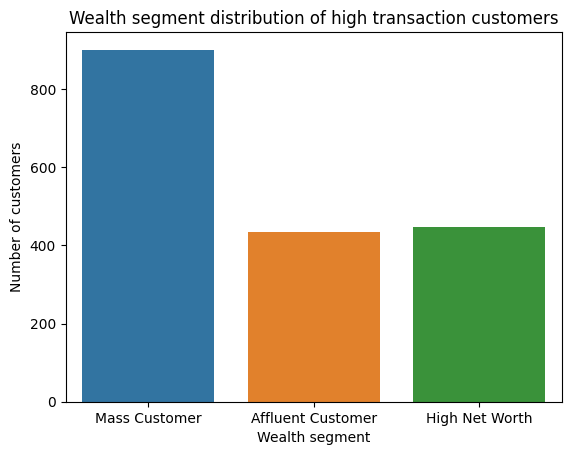

In [29]:
sns.countplot(x='wealth_segment', data=high_spending_customers_details)
plt.xlabel('Wealth segment')
plt.ylabel('Number of customers')
plt.title('Wealth segment distribution of high transaction customers')
plt.show()

<AxesSubplot: xlabel='gender', ylabel='age'>

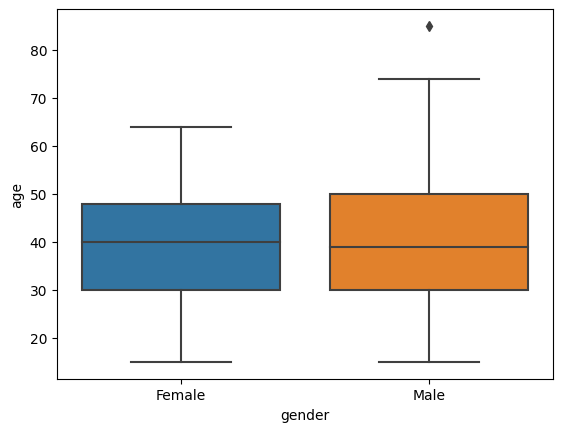

In [30]:
sns.boxplot(x='gender', y='age', data=high_spending_customers_details)

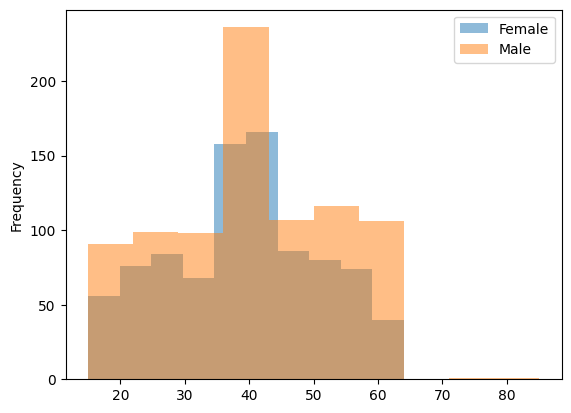

In [31]:
high_spending_customers_details.groupby('gender')['age'].plot(kind='hist', alpha=0.5, legend=True)
plt.show()

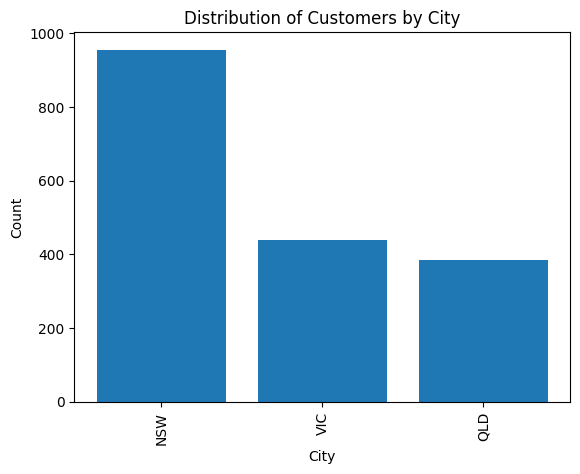

In [32]:
city_counts = high_spending_customers_details['state'].value_counts()
plt.bar(city_counts.index, city_counts)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Customers by City')
plt.show()

In [33]:
high_spending_customers_details['complete_address'] = high_spending_customers_details['address'] + ', ' + high_spending_customers_details['state'] + (' ') + high_spending_customers_details['postcode'] + ', ' + high_spending_customers_details['country']

In [34]:
high_spending_customers_details['complete_address']

0           060 Morning Avenue, NSW 2016, Australia
1                                               NaN
2          17979 Del Mar Point, NSW 2448, Australia
3           49 Londonderry Lane, NSW 265, Australia
4              97736 7th Trail, NSW 2023, Australia
                           ...                     
1777        3 Monument Crossing, NSW 209, Australia
1778             1 Dayton Park, NSW 2767, Australia
1779              3 Nova Point, VIC 3012, Australia
1780       310 Stephen Terrace, QLD 4073, Australia
1781    9491 Green Ridge Terrace, NSW 21, Australia
Name: complete_address, Length: 1782, dtype: object

In [35]:
def get_lat_long(address):
    g = geocoder.arcgis(address)
    return (g.lat, g.lng)

high_spending_customers_details[['latitude', 'longitude']] = high_spending_customers_details['complete_address'].apply(lambda x: pd.Series(get_lat_long(x)))

In [36]:
m = folium.Map(location=[high_spending_customers_details['latitude'].iloc[0], high_spending_customers_details['longitude'].iloc[0]], zoom_start=10)

for i, row in high_spending_customers_details.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=str(row['customer_id']) + ' ' + str(row['first_name'])).add_to(m)

m

In [37]:
high_spending_customers_details.corr()

,customer_id,past_3_years_bike_related_purchases,tenure,property_valuation,age,num_transactions,latitude,longitude
customer_id,1.000000,0.009533,-0.025791,-0.005715,-0.037835,0.001039,-0.036985,0.014161
past_3_years_bike_related_purchases,0.009533,1.000000,-0.040399,0.001771,-0.058624,-0.012442,0.028084,-0.006996
tenure,-0.025791,-0.040399,1.000000,-0.020139,0.452586,0.010937,0.007552,-0.003852
property_valuation,-0.005715,0.001771,-0.020139,1.000000,0.009755,0.013970,-0.255221,-0.000950
age,-0.037835,-0.058624,0.452586,0.009755,1.000000,-0.018944,0.006437,-0.048980
num_transactions,0.001039,-0.012442,0.010937,0.013970,-0.018944,1.000000,-0.013244,0.004530
latitude,-0.036985,0.028084,0.007552,-0.255221,0.006437,-0.013244,1.000000,-0.015634
longitude,0.014161,-0.006996,-0.003852,-0.000950,-0.048980,0.004530,-0.015634,1.000000


<AxesSubplot: >

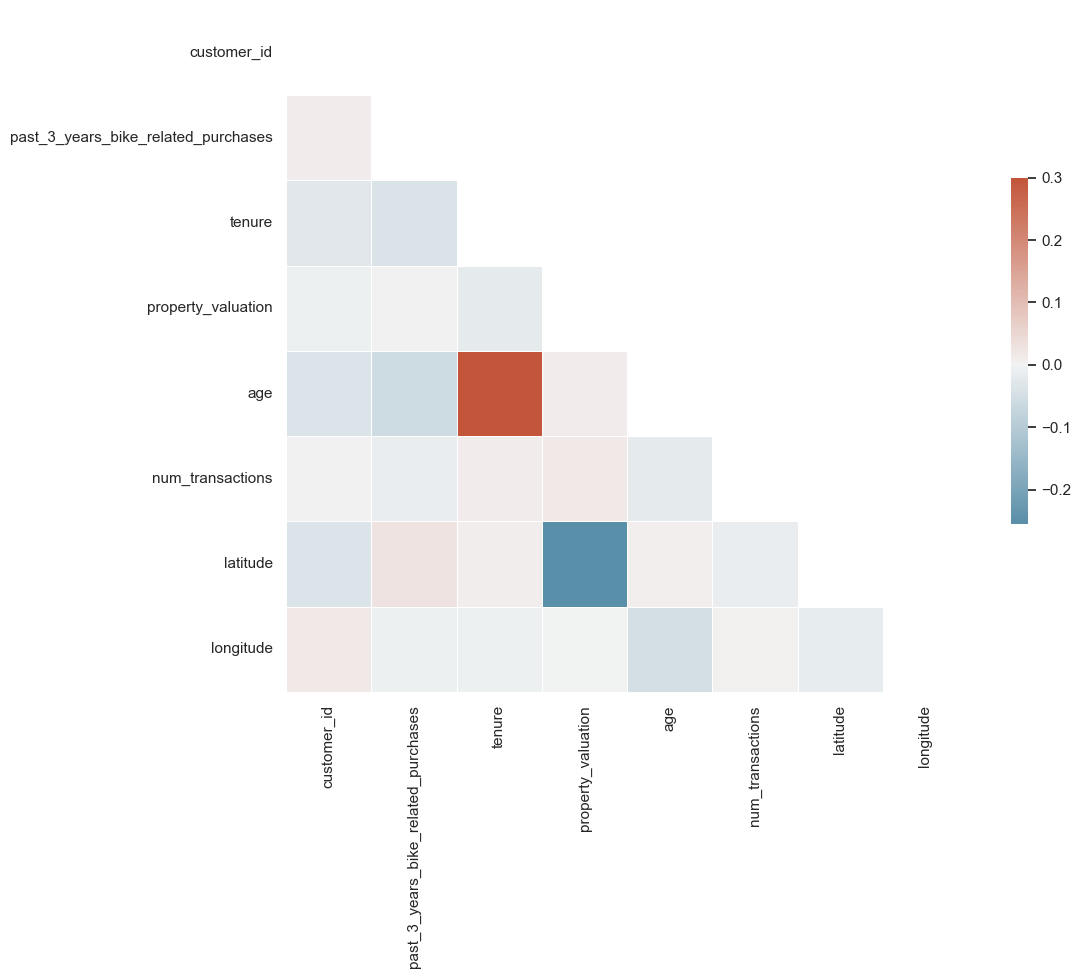

In [38]:
corr_matrix = high_spending_customers_details.corr()

sns.set_theme(style="white")

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [39]:
high_spending_customers_details.to_excel('TopCustomer.xlsx', index=False)